In [46]:
import pint
import numpy as np

ureg = pint.get_application_registry()
Q_ = ureg.Quantity

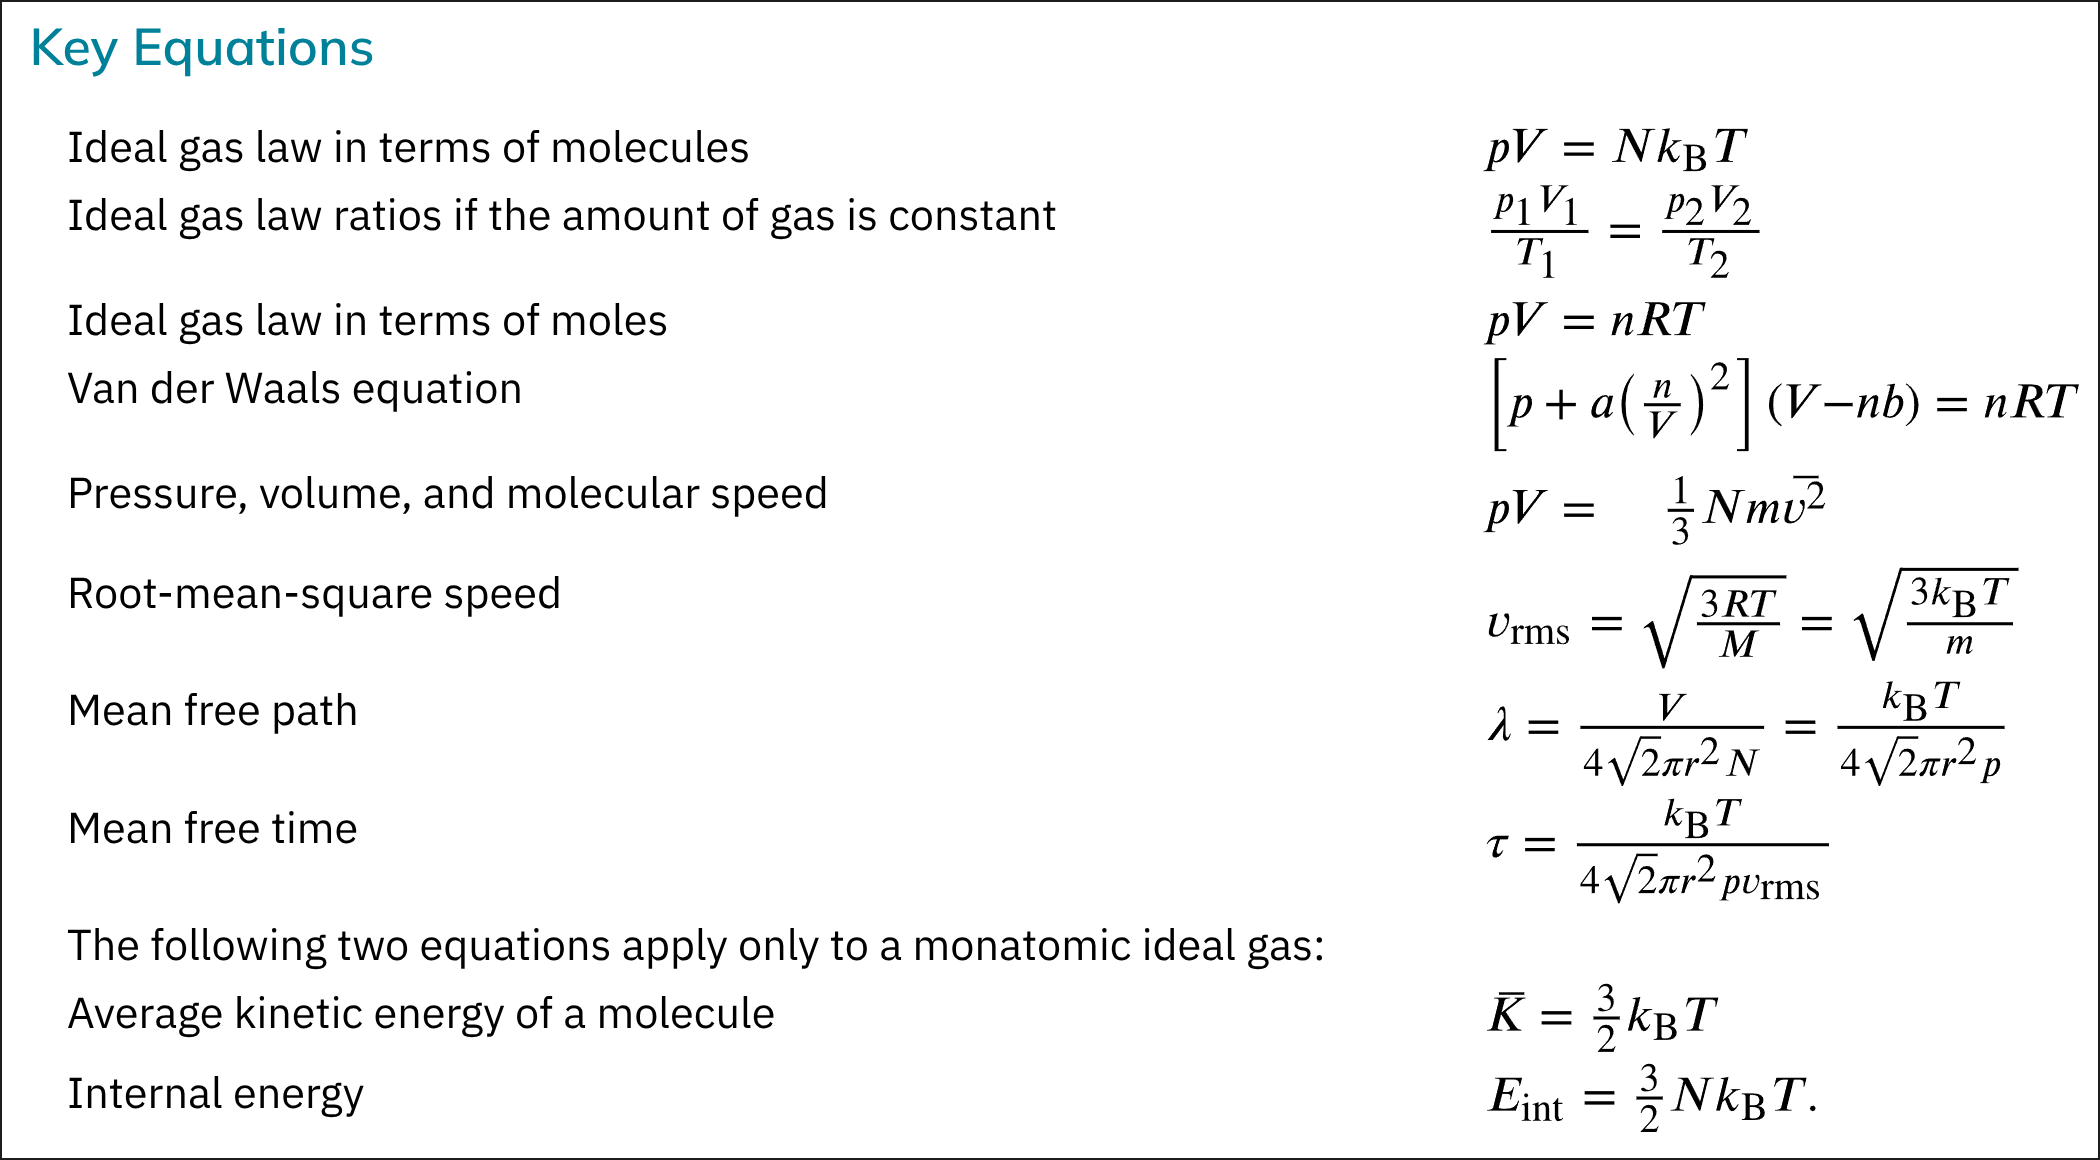

# Problem 20
People buying food in sealed bags at high
elevations often notice that the bags are puffed
up because the air inside has expanded. A bag of
pretzels was packed at a pressure of 1.00 atm
and a temperature of 22.0 $\degree C$. When opened at a
summer picnic in Santa Fe, New Mexico, at a
temperature of 32.0 $\degree C$ the volume of the air in
the bag is 1.38 times its original volume. What is
the pressure of the air?


We use the formula:

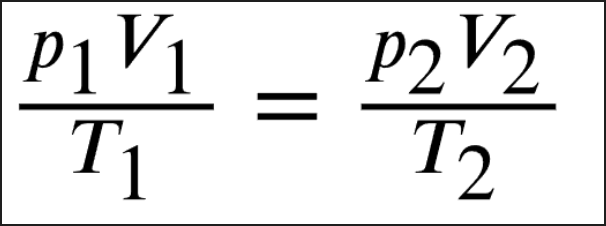

In [47]:
pressure = Q_(1, 'atm')
temperature = Q_(22, 'celsius').to('kelvin')
temperature_end = Q_(32, 'celsius').to('kelvin')
volume = Q_(1, 'l') # Arbitrary volume
volume_end = volume * 1.38

pressure_end = (pressure * volume * temperature_end) / (temperature * volume_end)
print(f"Final pressure: {pressure_end.to('atm'):.3f}")

Final pressure: 0.749 standard_atmosphere


# Problem 22
A cubic container of volume 2.00 L holds 0.500
mol of nitrogen gas at a temperature of 25 $\degree C$
What is the net force due to the nitrogen on one
wall of the container? Compare that force to the
sample’s weight.

we use the formula:

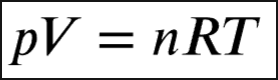


In [48]:
# First we calculate the pressure
V = Q_(2, 'liters').to('m**3')
n = Q_(0.5, 'moles')
R = Q_(8.314, 'J/(mol*K)')
T = Q_(25, 'celsius').to('kelvin')
P = (n * R * T) / V

print(f"The pressure is {P.to('Pa'):.2f} Pa")

# We now calculate the net force on one wall of the container
# We know we have a cubic container that holds 2 liters, so one side is:
A = (V**(1/3))**2
F = P * A
print(f"The force on one wall is {F.to('N'):.2f} N")

The pressure is 619704.77 pascal Pa
The force on one wall is 9837.20 newton N


# Problem 30
In a common demonstration, a bottle is heated
and stoppered with a hard-boiled egg that’s a
little bigger than the bottle’s neck. When the
bottle is cooled, the pressure difference
between inside and outside forces the egg into
the bottle. Suppose the bottle has a volume of
0.500 L and the temperature inside it is raised to 80 $\degree C$
while the pressure remains constant at
1.00 atm because the bottle is open. (a) How
many moles of air are inside? (b) Now the egg is
put in place, sealing the bottle. What is the
gauge pressure inside after the air cools back to
the ambient temperature of 25 $\degree C$ but before the
egg is forced into the bottle?

In [49]:
bottle_volume = Q_(0.5, 'liters')
T_inside = Q_(80, 'degC')
P = Q_(1, 'atm')
R = Q_(8.314, 'J/(mol*K)')

moles_of_air = (P * bottle_volume) / (R * T_inside.to('K'))

print(f"There is {moles_of_air.to('moles'):.3f} of air in the bottle at {T_inside} and {P}.")

# The pressure after cool down to 25 degC
T_inside = Q_(25, 'degC')
P_before = P.to('Pa')
P_after = (moles_of_air * R * T_inside.to('K')) / bottle_volume - P_before
print(f"The pressure after cooling to {T_inside} is {P_after.to('Pa'):.2e}.")

There is 0.017 mole of air in the bottle at 80 degree_Celsius and 1 standard_atmosphere.
The pressure after cooling to 25 degree_Celsius is -1.58e+04 pascal.


# Problem 39
Typical molecular speeds ($v_{rms}$) are large, even
at low temperatures. What is $v_{rms}$ for helium
atoms at 5.00 K, less than one degree above
helium’s liquefaction temperature?

In [50]:
T = Q_(5, 'kelvin')
R = Q_(8.314, 'J/(mol*K)')
M_helium = Q_(4.0026, 'g/mole')

v_rms = np.sqrt(3 * R * T / M_helium.to('kg/mole'))
print(f"The RMS speed of helium atoms at {T} is {v_rms.to('m/s'):.0f}.")


The RMS speed of helium atoms at 5 kelvin is 177 meter / second.


# Problem 42
What is the total translational kinetic energy of
the air molecules in a room of volume 23 $m^3$ if
the pressure is $9.5 \times 10^4$ Pa (the room is at
fairly high elevation) and the temperature is 21 $\degree C$? Is any item of data unnecessary for the
solution?

We have the formula:
$$
E_{int} = \frac{3}{2} N K_B T
$$
but we know that
$$
pV = N K_B T
$$
so we have
$$
E_{int} = \frac{3}{2} pV
$$

In [51]:
V = Q_(23, 'm^3')
P = Q_(9.5e4, 'Pa')
T = Q_(21, 'degC').to('K')

KE_total = (3/2) * P * V
print(f"The total translational kinetic energy of the air in the room is {KE_total.to('J'):.2e}.")

The total translational kinetic energy of the air in the room is 3.28e+06 joule.


The temperature is unnecessary data for the solution

# Problem 58
(a) How much heat must be added to raise the
temperature of 1.5 mol of air from 25 $\degree C$ to 33 $\degree C$
at constant volume? Assume air is
completely diatomic. (b) Repeat the problem for
the same number of moles of xenon, Xe.

In [52]:
mol_air = Q_(1.5, 'moles')
T_start = Q_(25, 'degC').to('K')
T_end = Q_(33, 'degC').to('K')
R = Q_(8.314, 'J/(mol*K)')

# Heat needed to raise the temperature
d = 5  # As it is diatomic if it were monatomic it would be 3
C_v = (d / 2) * R
Q = mol_air * C_v * (T_end - T_start)
print(f"The heat needed to raise the temperature of 1.5 moles of air from {T_start} to {T_end} is {Q.to('J'):.0f}.")

# For xenon, we need to find out if it diatomic or monatomic
# It is monatomic, so d = 3 as it is an ideal gas
d = 3 
C_v = (d / 2) * R
Q = mol_air * C_v * (T_end - T_start)
print(f"The heat needed to raise the temperature of 1.5 moles of xeon from {T_start} to {T_end} is {Q.to('J'):.0f}.")


The heat needed to raise the temperature of 1.5 moles of air from 298.15 kelvin to 306.15 kelvin is 249 joule.
The heat needed to raise the temperature of 1.5 moles of xeon from 298.15 kelvin to 306.15 kelvin is 150 joule.


# Problem 70
Using a numerical integration method such as
Simpson’s rule, find the fraction of molecules in
a sample of oxygen gas at a temperature of 250
K that have speeds between 100 m/s and 150
m/s. The molar mass of oxygen ($O_2$) is 32.0 g/
mol. A precision to two significant digits is
enough.

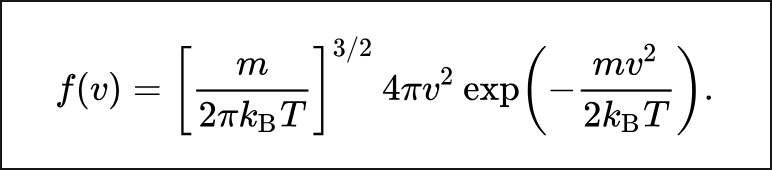

In [53]:
from scipy.integrate import trapezoid

T = Q_(250, 'K')
M_oxygen = Q_(32, 'g/mole').to('kg/mole')
R = Q_(8.314, 'J/(mol*K)')
# Using numerical integration to find the fraction of molecules with speed between 100 m/s and 150 m/s
# Speed range from 100 m/s to 150 m/s. Using 1000 points for better accuracy.
v = np.linspace(100, 150, 1000) * Q_('m/s')

# The argument of np.exp must be dimensionless. Using R with units ensures this.
exp_term = np.exp(-M_oxygen * v**2 / (2 * R * T))
pre_factor = 4 * np.pi * (M_oxygen / (2 * np.pi * R * T))**(3/2)

f_v = pre_factor * v**2 * exp_term

# --- Integration ---
# The Maxwell-Boltzmann distribution is a probability density.
# Integrating it over a specific range directly gives the fraction (probability).
# No normalization by dividing by another integral is needed.
fraction = trapezoid(f_v, v)

print(f"The fraction of oxygen molecules with speed between 100 m/s and 150 m/s is {fraction:.2g}.")


The fraction of oxygen molecules with speed between 100 m/s and 150 m/s is 0.034.
